In [1]:
#installation
%pip install senepy

     |████████████████████████████████| 3.5 MB 30.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#scanpy is recommended for handling single-cell data
%pip install scanpy

In [8]:
#load modules
import senepy as sp
import scanpy as sc

### Import senescence gene hubs from study

In [2]:
hubs = sp.load_hubs(species = 'Mouse') #supports Human and Mouse

hubs.metadata will contain a list of the hubs within the hubs object. It contains which tissue and cell type
the hub was derived from as well as the hub_num if there were multiple senescence hubs within that cell type.
n_sen: number of 180 prior "known" senescence markers curated from literature that were found in the hub.
hyp: enrichment p-value of the "known" and novel hub genes

In [3]:
hubs.metadata

,tissue,cell,hub_num,size,n_sen,hyp
0,Bladder,bladder cell,0,20,0,1.000000
1,Bladder,bladder cell,1,36,0,1.000000
2,Bladder,bladder cell,2,61,2,0.107390
3,Bladder,endothelial cell,1,29,0,1.000000
4,Diaphragm,mesenchymal stem cell,0,88,0,1.000000
...,...,...,...,...,...,...
70,Trachea,basal cell,1,495,16,0.000013
71,Trachea,fibroblast,0,680,21,0.000001
72,Trachea,fibroblast,1,74,2,0.147080
73,Trachea,macrophage,0,1654,23,0.028732


In [4]:
#Look at hubs within Lung
hubs.metadata[hubs.metadata.tissue == 'Lung'] #capitalization matters

,tissue,cell,hub_num,size,n_sen,hyp
47,Lung,alveolar macrophage,0,76,2,1.534293e-01
48,Lung,alveolar macrophage,1,33,0,1.000000e+00
49,Lung,alveolar macrophage,2,55,1,3.971457e-01
50,Lung,fibroblast,0,254,3,4.110577e-01
51,Lung,fibroblast,1,547,23,1.201959e-09


hubs.hubs will contain a dictionary of the hub identifiers and the hub genes/importance values.
To get the information for an individual hub we pass the identifiers to the dictionary:

In [5]:
hubs.hubs[('Lung', 'fibroblast', 1)][:10] #only showing first 10 with [:10]

[('Arhgap30', 40),
 ('Serinc2', 30),
 ('Enc1', 51),
 ('Susd3', 50),
 ('Krt5', 201),
 ('Aldh3b2', 102),
 ('Csf2rb', 68),
 ('Acot10', 22),
 ('Ptprb', 8),
 ('4632427E13Rik', 9)]

### Get gene list from a hub/signature

In [6]:
hubs.get_genes(('Lung', 'fibroblast', 1))[:10]

['Arhgap30',
 'Serinc2',
 'Enc1',
 'Susd3',
 'Krt5',
 'Aldh3b2',
 'Csf2rb',
 'Acot10',
 'Ptprb',
 '4632427E13Rik']

In [7]:
#if you used 'cell_type' in load_hubs it would looke like this:
#hubs.get_genes(('Lung', 'fibroblast'))

### Merge signatures
Sometimes you may want to merge multiple signatures into one.
For example, if there is no signature that represents your specific cell type, you can try merging all from that tissue. We can also merge all signatures to create a universal signature.

In [8]:
#filter the metadata to only include what you want to merge
filt_meta = hubs.metadata[hubs.metadata.tissue == 'Lung']
filt_meta

,tissue,cell,hub_num,size,n_sen,hyp
47,Lung,alveolar macrophage,0,76,2,1.534293e-01
48,Lung,alveolar macrophage,1,33,0,1.000000e+00
49,Lung,alveolar macrophage,2,55,1,3.971457e-01
50,Lung,fibroblast,0,254,3,4.110577e-01
51,Lung,fibroblast,1,547,23,1.201959e-09


Below we merge the Lung signatures into one new signature. By default, the union of all genes is taken. The respective value for each gene is the number of times that gene is found in the input signatures

In [9]:
hubs.merge_hubs(filt_meta, new_name = 'Lung_merged')

In [12]:
len(hubs.hubs['Lung_merged'])

937

In [11]:
hubs.hubs['Lung_merged'][:10] #looking at the first 10 items in the new signature

[('Adora2a', 1),
 ('Srgap1', 1),
 ('Rgs18', 1),
 ('Rap1gap2', 1),
 ('Ms4a4c', 1),
 ('Eif4e3', 1),
 ('Susd3', 2),
 ('Padi4', 1),
 ('Elane', 2),
 ('Ms4a6b', 1)]

### Universal signature
We can increase the threshold. For example, if we want to keep signatures that occur at least 2 times. This number will drastically reduce the number of genes in the resulting signature if only merging a handful of input signatures.

In [13]:
hubs.merge_hubs(filt_meta, new_name = 'Lung_merged_min2', overlap_threshold = 2)

In [14]:
len(hubs.hubs['Lung_merged_min2'])

28

We can also cacluate a threshold automatically using a permutation-based method. In the example below, we can merge all signatures from all tissues and cells. We then use a 5% random chance threshold and remove all the genes that occur less than that number of times.

In [15]:
hubs.merge_hubs(hubs.metadata, new_name = 'universal', calculate_thresh = True)

100%|███████████████████████████████████| 1000/1000 [00:55<00:00, 17.89it/s]

A gene will occur 4 times at 4.65% chance
Threfore 4 is the calculated_threshold


In [16]:
len(hubs.hubs['universal'])

1166

In [18]:
hubs.hubs['universal'][:10]

[('Agtr1a', 4),
 ('Cadm4', 4),
 ('Fam89a', 4),
 ('Syt7', 5),
 ('Msln', 4),
 ('Slpi', 15),
 ('Pkhd1l1', 4),
 ('Podxl', 5),
 ('Prr15l', 4),
 ('Prlr', 4)]

You can adjust additional parameters of merge_hubs to change the chance required, etc. see hubs.merge_hubs?

In [24]:
#if you want to see the top genes of any signature
sorted(hubs.hubs['universal'], key=lambda x: x[1], reverse=True)[:10]

[('Hba-a1', 26),
 ('Hbb-b1', 19),
 ('Saa3', 18),
 ('Gm11428', 18),
 ('Vsig4', 17),
 ('Slpi', 15),
 ('Igj', 15),
 ('Cxcl13', 15),
 ('Elane', 15),
 ('Ccl5', 14)]

### Prior knowledge gene set and senGPT gene set used in this study

To get the prior knowledge markers taken from the literature in this study you can use the following:

In [12]:
hubs.literature_markers #this includes their function or source

In [10]:
list(hubs.literature_markers)[:10] #to only get the gene names pass it to list()

['Cdkn2a',
 'Cdkn2b',
 'Cdkn1a',
 'Cdkn1b',
 'Trp53',
 'Rb1',
 'Glb1',
 'Tfeb',
 'Nfkb1',
 'Cebpb']

To get senGPT markers:

In [4]:
hubs.senGPT[0:10] #only showing first 10 with [0:10]. Remove it to get all

['Cdkn2a',
 'Cdkn1a',
 'Cdkn2b',
 'Il6',
 'Il8',
 'Cxcl1',
 'Cxcl2',
 'Cxcl3',
 'Cxcl5',
 'Cxcl6']

### Search the hubs/signatures by genes

Example of custom input gene search:

In [6]:
hubs.search_hubs_by_genes(['Cdkn2a', 'Cdkn1a', 'Il6', 'Cxcl13']).head() #remove .head() for all results

,tissue,cell_type,hub_num,size,num_hits,p_value,p_adj,hits
0,Tongue,basal cell,0,66,2,0.000041,0.003078,"[Il6, Cxcl13]"
1,Lymphoid,T cell,1,71,2,0.000048,0.001783,"[Cdkn2a, Cxcl13]"
2,Tongue,keratinocyte,0,133,2,0.000167,0.004184,"[Il6, Cxcl13]"
3,Heart_and_Aorta,myocyte,2,147,2,0.000204,0.003834,"[Il6, Cxcl13]"
4,Heart_and_Aorta,endocardial cell,1,300,2,0.000848,0.012713,"[Il6, Cxcl13]"


Example using senGPT markers:

In [5]:
hubs.search_hubs_by_genes(hubs.senGPT).head()

,tissue,cell_type,hub_num,size,num_hits,p_value,p_adj,hits
0,Heart_and_Aorta,myocyte,2,147,8,1.390877e-07,0.000010,"[Il6, Mmp3, Il10, Tnf, Ccl2, Ccl5, Mmp25, E2f2]"
1,Liver,endothelial cell of hepatic sinusoid,0,277,8,1.583844e-05,0.000594,"[Cdkn2a, Cdkn2b, Edn1, Bmp4, Igfbp5, Mmp15, E2..."
2,Tongue,keratinocyte,0,133,5,1.984935e-04,0.004962,"[Il6, Cxcl3, Mmp3, Ccl5, Vcam1]"
3,Heart_and_Aorta,endocardial cell,1,300,7,2.063324e-04,0.003869,"[Cdkn2b, Il6, Cxcl2, Mmp9, Mmp12, Tnf, Ccl5]"
4,Kidney,Henle thick ascending limb epithelial cell,0,1035,13,2.460405e-04,0.003691,"[Cxcl1, Mmp14, Il1b, Ccl2, Ccl5, Icam1, Timp2,..."


Note that the the default background size is 25000 (bg_N = 25000) for this and the p_value will be more accurate if it reflects your study context

# Cell scoring Example:

### Loading in single-cell adata

This step is specific to your project -- for this example we will load in single cells from mouse lungs from Tabula Muris Senis.

In [7]:

#downloading file from TMS figshare https://figshare.com/projects/Tabula_Muris_Senis/64982
!curl -o lung.h5ad "https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/23873012/tabulamurissenisdropletprocessedofficialannotationsLung.h5ad"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  648M  100  648M    0     0  19.8M      0  0:00:32  0:00:32 --:--:-- 22.1M


In [8]:
adata = sc.read_h5ad('lung.h5ad')

/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/ubuntu/miniconda3/envs/sc/lib/python3.10/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [9]:
adata.obs

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
AAACGGGTCGCCCTTA-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAACGGGTCGCCCTTA,B cell,NA,B,droplet,18-F-50,1821.0,female,nan,Lung,Lung,5774.0,4,3
AAAGATGAGCAGACTG-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGATGAGCAGACTG,non-classical monocyte,NA,Nonclassical Monocyte,droplet,18-F-50,1333.0,female,nan,Lung,Lung,3878.0,2,1
AAAGATGAGCCGTCGT-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGATGAGCCGTCGT,NK cell,NA,Natural Killer,droplet,18-F-50,1455.0,female,nan,Lung,Lung,3990.0,7,5
AAAGCAACATGGTAGG-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGCAACATGGTAGG,alveolar macrophage,NA,Alveolar Macrophage,droplet,18-F-50,3322.0,female,nan,Lung,Lung,13346.0,9,8
AAAGCAAGTCTAGTGT-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGCAAGTCTAGTGT,B cell,NA,B,droplet,18-F-50,1120.0,female,nan,Lung,Lung,2608.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_P8_13_TTTGGTTAGGGATACC-1,3m,10X_P8_13_TTTGGTTAGGGATACC,fibroblast of lung,CL:0000499,Alveolar Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,2803.0,10,12
10X_P8_13_TTTGGTTTCCTGTACC-1,3m,10X_P8_13_TTTGGTTTCCTGTACC,NK cell,CL:0000623,Natural Killer,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,3049.0,7,5
10X_P8_13_TTTGTCAAGAGTCGGT-1,3m,10X_P8_13_TTTGTCAAGAGTCGGT,pulmonary interstitial fibroblast,CL:0000499,Myofibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,3041.0,15,22


### Translate hub genes - optional


References may use different gene aliases or may practice different capitalization standards. We include
a simple tool to translate the hub gene names to the corresponding gene names in your reference dataset.
This is not a catch all for every situation. You can manually add a dictionary to the translator if your
dataset is an exception or the transltor does not catch all.

In [10]:
translator = sp.translator(hub = hubs.hubs, data = adata)

0 of 18811 genes not initially present
0 of 0 translated
0 still not present


With our input dataset we did not need to translate because all of the genes match. However, this is not always the case. Do not worry if 100% of the genes are not present. There are multiple reasons why this may be the case. For
example, if you filtered the genes previously.

### Score cells

It is best to score only individual cell types at a time. Below we subset the trachea cells to only fibroblasts
then apply the fibroblast hub to score it.

In [11]:
#score_hub returns a list and we can save this directly to the adata.obs dataframe

fib_subset = adata[adata.obs['cell_ontology_class'] == 'fibroblast of lung'].copy()

fib_subset.obs['sen_score'] = sp.score_hub(fib_subset, hubs.hubs[('Lung', 'fibroblast', 0)])




In [12]:
fib_subset.obs #we saved the score in the sen_score column of .obs

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation,n_counts,louvain,leiden,sen_score
index,,,,,,,,,,,,,,,,
CGATCGGGTACTTAGC-1-11-0-0,18m,MACA_18m_F_LUNG_50_CGATCGGGTACTTAGC,fibroblast of lung,NA,Alveolar Fibroblast,droplet,18-F-50,1561.0,female,nan,Lung,Lung,3383.0,10,12,0.683934
CGCTATCAGCGGATCA-1-11-0-0,18m,MACA_18m_F_LUNG_50_CGCTATCAGCGGATCA,fibroblast of lung,NA,Alveolar Fibroblast,droplet,18-F-50,1705.0,female,nan,Lung,Lung,3039.0,10,12,1.217730
CGTCACTAGGCATGTG-1-11-0-0,18m,MACA_18m_F_LUNG_50_CGTCACTAGGCATGTG,fibroblast of lung,NA,Alveolar Fibroblast,droplet,18-F-50,1839.0,female,nan,Lung,Lung,3827.0,10,12,0.199682
TCAGGTATCCAGGGCT-1-11-0-0,18m,MACA_18m_F_LUNG_50_TCAGGTATCCAGGGCT,fibroblast of lung,NA,Alveolar Fibroblast,droplet,18-F-50,2535.0,female,nan,Lung,Lung,6051.0,10,12,0.453288
AAAGATGAGGACGAAA-1-12-0-0,18m,MACA_18m_F_LUNG_51_AAAGATGAGGACGAAA,fibroblast of lung,NA,Alveolar Fibroblast,droplet,18-F-51,1524.0,female,nan,Lung,Lung,3115.0,10,12,0.494737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_P8_13_TTTCCTCAGAGGGCTT-1,3m,10X_P8_13_TTTCCTCAGAGGGCTT,fibroblast of lung,CL:0000499,Alveolar Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,6419.0,10,17,0.165665
10X_P8_13_TTTGCGCGTTGATTGC-1,3m,10X_P8_13_TTTGCGCGTTGATTGC,fibroblast of lung,CL:0000499,Alveolar Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,2661.0,10,12,0.314077
10X_P8_13_TTTGCGCTCTCCTATA-1,3m,10X_P8_13_TTTGCGCTCTCCTATA,fibroblast of lung,CL:0000499,Alveolar Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,3699.0,19,17,0.200124


### Score multiple cell types at once

If you want to apply one hub to all cells, we have a function that subsets the data based on identifiers prior to scoreing and returns a score for every cell. In the below example we don't have to subset the data like above:

In [15]:
adata.obs

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation,n_counts,louvain,leiden
index,,,,,,,,,,,,,,,
AAACGGGTCGCCCTTA-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAACGGGTCGCCCTTA,B cell,NA,B,droplet,18-F-50,1821.0,female,nan,Lung,Lung,5774.0,4,3
AAAGATGAGCAGACTG-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGATGAGCAGACTG,non-classical monocyte,NA,Nonclassical Monocyte,droplet,18-F-50,1333.0,female,nan,Lung,Lung,3878.0,2,1
AAAGATGAGCCGTCGT-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGATGAGCCGTCGT,NK cell,NA,Natural Killer,droplet,18-F-50,1455.0,female,nan,Lung,Lung,3990.0,7,5
AAAGCAACATGGTAGG-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGCAACATGGTAGG,alveolar macrophage,NA,Alveolar Macrophage,droplet,18-F-50,3322.0,female,nan,Lung,Lung,13346.0,9,8
AAAGCAAGTCTAGTGT-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGCAAGTCTAGTGT,B cell,NA,B,droplet,18-F-50,1120.0,female,nan,Lung,Lung,2608.0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_P8_13_TTTGGTTAGGGATACC-1,3m,10X_P8_13_TTTGGTTAGGGATACC,fibroblast of lung,CL:0000499,Alveolar Fibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,2803.0,10,12
10X_P8_13_TTTGGTTTCCTGTACC-1,3m,10X_P8_13_TTTGGTTTCCTGTACC,NK cell,CL:0000623,Natural Killer,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,3049.0,7,5
10X_P8_13_TTTGTCAAGAGTCGGT-1,3m,10X_P8_13_TTTGTCAAGAGTCGGT,pulmonary interstitial fibroblast,CL:0000499,Myofibroblast,droplet,3-M-7/8,NaN,male,immune-endo-depleted,Lung,Lung,3041.0,15,22


In [17]:
adata.obs['lung_fib_0_score'] = sp.score_all_cells(adata, hubs.hubs[('Lung', 'fibroblast', 0)],
                   identifiers = ['cell_ontology_class'])

100%|███████████████████████████████████████████████████████████████████████████| 30/30 [00:23<00:00,  1.26it/s]


We can pass multiple identifier levels to split the data further. For example, if you had multiple tissues and cell types you could include tissue along with cell type. In this example, we will split by mouse sex:

In [18]:
adata.obs['lung_fib_0_score_sex'] = sp.score_all_cells(adata, hubs.hubs[('Lung', 'fibroblast', 0)],
                   identifiers = ['cell_ontology_class', 'sex'])

100%|███████████████████████████████████████████████████████████████████████████| 59/59 [00:41<00:00,  1.43it/s]


In [19]:
adata.obs.head()

,age,cell,cell_ontology_class,cell_ontology_id,free_annotation,method,mouse.id,n_genes,sex,subtissue,tissue,tissue_free_annotation,n_counts,louvain,leiden,lung_fib_0_score,lung_fib_0_score_sex
index,,,,,,,,,,,,,,,,,
AAACGGGTCGCCCTTA-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAACGGGTCGCCCTTA,B cell,NA,B,droplet,18-F-50,1821.0,female,nan,Lung,Lung,5774.0,4,3,11.128093,11.107001
AAAGATGAGCAGACTG-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGATGAGCAGACTG,non-classical monocyte,NA,Nonclassical Monocyte,droplet,18-F-50,1333.0,female,nan,Lung,Lung,3878.0,2,1,6.384672,6.385467
AAAGATGAGCCGTCGT-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGATGAGCCGTCGT,NK cell,NA,Natural Killer,droplet,18-F-50,1455.0,female,nan,Lung,Lung,3990.0,7,5,6.748975,6.756562
AAAGCAACATGGTAGG-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGCAACATGGTAGG,alveolar macrophage,NA,Alveolar Macrophage,droplet,18-F-50,3322.0,female,nan,Lung,Lung,13346.0,9,8,11.930262,11.883487
AAAGCAAGTCTAGTGT-1-11-0-0,18m,MACA_18m_F_LUNG_50_AAAGCAAGTCTAGTGT,B cell,NA,B,droplet,18-F-50,1120.0,female,nan,Lung,Lung,2608.0,4,3,7.567527,7.571177


### Example analyses

<AxesSubplot:>

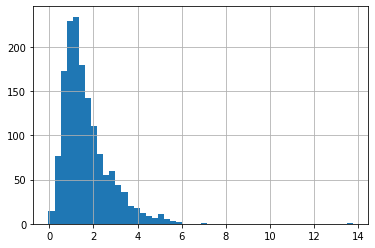

In [60]:
fib_subset.obs.sen_score.hist(bins = 50)

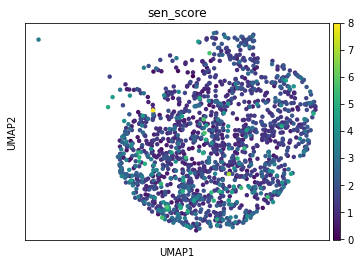

In [76]:
sc.pl.umap(fib_subset, color='sen_score', vmax = 8)

In [69]:
fib_subset.obs.groupby('age').count()[['cell']] #number of fibroblasts at each age

,cell
age,
1m,87
3m,1143
18m,166
21m,101
30m,26


Let's set a threshold for what we might consider putative senescent cells. The threshold will change depending
on your testing conditions so we have left that up to the researcher. For example, if you enrich for senescent cells prior to sequencing you would expect more to be contributing to your distribution. In natural aging, since we still expect senescent cells to be in the minority, we have found that the mean plus 3 standard deviations to work well.

In [72]:
e = fib_subset.obs.sen_score.mean() #distribution mean
std = fib_subset.obs.sen_score.std() #distribution std

In [77]:
thresh = e + 3*std
thresh

4.884478992612143

In [80]:
#function to add senescent label
def is_putative_sen(x):
    if x >= thresh:
        return 1
    else:
        return 0
    
    
#map function to a new row in adata.obs
fib_subset.obs['putative_sen'] = fib_subset.obs.sen_score.map(is_putative_sen)

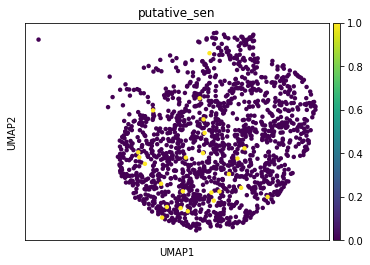

In [83]:
sc.pl.umap(fib_subset, color='putative_sen')

In [85]:
#compare % of sen cells at 3m vs 21m
m3_sub = fib_subset[fib_subset.obs.age == '3m']
m21_sub = fib_subset[fib_subset.obs.age == '21m']


In [90]:
m3_sub.obs.putative_sen.sum() / len(m3_sub) * 100

0.6124234470691163

In [91]:
m21_sub.obs.putative_sen.sum() / len(m21_sub) * 100

12.871287128712872

Note: Doing this direct percentage comparison is not advisable if the number of cells for a given group is small. E.g., if you have 20 cells in your data and none of them were senescent, you can't say that 0% of the cells in the actual population were senescent. However, you can still find senescent cells in smaller populations and explore their transcriptomes in different ways! Now that the senescent cells are labeled you can explore them further in great detail. DE analysis, TF analysis, regulatory networks, coexpression, etc